In [1]:
!pip install catboost
import numpy as np    #for mathematical operations
from catboost import Pool, CatBoostRegressor   #internal data format
import pandas as pd   #for data analysis and machine learning task
import numpy as np
import seaborn as sns    #for interactive graphs  
from sklearn.model_selection import train_test_split  #for splitting data into train and test
from sklearn.metrics import mean_squared_error  

You should consider upgrading via the 'C:\Users\raahi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
path = "blrdataset_smoted.csv" 
air = pd.read_csv(path) #read dataset csv file
air


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Bengaluru,14/11/2015,42.420000,156.840000,7.250000,29.940000,31.780000,21.940000,1.560000,2.230000,31.350000,1.820000,4.650000,130.000000,Moderate
1,Bengaluru,19/11/2015,21.990000,39.860000,7.080000,16.440000,19.510000,41.960000,1.730000,2.950000,9.980000,1.520000,2.380000,103.000000,Moderate
2,Bengaluru,20/11/2015,13.890000,31.440000,6.840000,12.140000,15.350000,23.930000,1.720000,2.500000,4.560000,0.740000,1.480000,74.000000,Satisfactory
3,Bengaluru,23/11/2015,19.660000,36.840000,6.470000,16.370000,20.870000,24.040000,1.350000,2.830000,4.090000,1.180000,2.170000,75.000000,Satisfactory
4,Bengaluru,24/11/2015,20.350000,33.970000,7.760000,20.640000,24.750000,26.980000,1.360000,2.590000,7.770000,1.020000,1.900000,85.000000,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,Bengaluru,12/03/2016,68.841410,149.573030,6.578259,24.425440,16.168066,19.284634,1.048988,5.444377,63.346747,1.521844,1.503852,140.834015,Moderate
3477,Bengaluru,28/11/2018,56.712354,112.353563,11.912739,31.065665,32.980470,17.007215,1.053336,6.117109,52.218354,0.351617,1.580572,128.161272,Moderate
3478,Bengaluru,27/12/2018,57.789571,115.552936,6.378979,27.975025,29.271785,17.349716,0.982851,6.931973,52.935451,0.378652,1.802802,118.481144,Moderate
3479,Bengaluru,02/02/2019,41.528221,96.867690,8.193018,31.200663,30.770269,14.176213,0.879080,5.436097,61.150219,0.510178,1.612898,103.679947,Moderate


In [3]:
X=air[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene"]]
y=air["AQI"]

In [4]:
y.shape #dimension of y axis

(3481,)

splitting dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =42) 
#random_state-> selection of random combination of test and train
#test_size-> size of the test data sample

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler() #standardize x values->normalize data->no bias
sc_y = StandardScaler() #standardize y values
X_train = sc_x.fit_transform(X_train)     #use fit_transform for train and transform for test
X_test = sc_x.transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))  #want numpy to determine what would be the dimension of y_train
y_test = sc_y.transform(np.array(y_test).reshape(-1,1)) #rows=unknown, column=1

In [7]:
train_pool = Pool(X_train, 
                  y_train,
                  cat_features=None) #Catboost uses pooling for faster execution
test_pool = Pool(X_test,
                 y_test,
                 cat_features=None) 

In [8]:
model = CatBoostRegressor(iterations=1500, #setting number of iterations
                          depth=10, #regression depth is set -  the regression depth of a hyperplane  is the smallest number of residuals that need to change sign to make  a nonfit
                          learning_rate = 0.01, #the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
                          loss_function='RMSE', #loss function is the function that computes the distance between the current output of the algorithm and the expected output.
                          eval_metric = 'RMSE', #evaluation metric
                          random_seed = 55, #random seed value while creating training and test data set
                          od_type = "Iter", #overfitting detector - to stop after given number of iterations
                          metric_period = 1, #metrics to be calculated after every 1 iteration
                          od_wait = 20) #The number of iterations to continue the training after the iteration with the optimal metric value

In [9]:
model.fit(train_pool)

0:	learn: 0.9915816	total: 163ms	remaining: 4m 4s
1:	learn: 0.9830256	total: 196ms	remaining: 2m 26s
2:	learn: 0.9747546	total: 228ms	remaining: 1m 53s
3:	learn: 0.9664890	total: 261ms	remaining: 1m 37s
4:	learn: 0.9582091	total: 292ms	remaining: 1m 27s
5:	learn: 0.9503080	total: 324ms	remaining: 1m 20s
6:	learn: 0.9424340	total: 355ms	remaining: 1m 15s
7:	learn: 0.9343588	total: 391ms	remaining: 1m 13s
8:	learn: 0.9266349	total: 425ms	remaining: 1m 10s
9:	learn: 0.9188355	total: 460ms	remaining: 1m 8s
10:	learn: 0.9114182	total: 495ms	remaining: 1m 6s
11:	learn: 0.9038355	total: 527ms	remaining: 1m 5s
12:	learn: 0.8960952	total: 558ms	remaining: 1m 3s
13:	learn: 0.8885156	total: 561ms	remaining: 59.6s
14:	learn: 0.8810483	total: 597ms	remaining: 59.1s
15:	learn: 0.8737860	total: 638ms	remaining: 59.2s
16:	learn: 0.8663408	total: 674ms	remaining: 58.8s
17:	learn: 0.8591975	total: 708ms	remaining: 58.3s
18:	learn: 0.8519314	total: 741ms	remaining: 57.8s
19:	learn: 0.8447913	total: 775ms

165:	learn: 0.2813746	total: 5.84s	remaining: 46.9s
166:	learn: 0.2796514	total: 5.88s	remaining: 46.9s
167:	learn: 0.2779416	total: 5.91s	remaining: 46.9s
168:	learn: 0.2761808	total: 5.95s	remaining: 46.8s
169:	learn: 0.2744709	total: 5.98s	remaining: 46.8s
170:	learn: 0.2728431	total: 6.01s	remaining: 46.7s
171:	learn: 0.2711999	total: 6.04s	remaining: 46.7s
172:	learn: 0.2695041	total: 6.08s	remaining: 46.6s
173:	learn: 0.2678388	total: 6.12s	remaining: 46.6s
174:	learn: 0.2662472	total: 6.16s	remaining: 46.6s
175:	learn: 0.2647271	total: 6.19s	remaining: 46.6s
176:	learn: 0.2632104	total: 6.22s	remaining: 46.5s
177:	learn: 0.2616810	total: 6.26s	remaining: 46.5s
178:	learn: 0.2600757	total: 6.29s	remaining: 46.4s
179:	learn: 0.2585480	total: 6.33s	remaining: 46.4s
180:	learn: 0.2571137	total: 6.36s	remaining: 46.4s
181:	learn: 0.2556452	total: 6.39s	remaining: 46.3s
182:	learn: 0.2541411	total: 6.43s	remaining: 46.3s
183:	learn: 0.2526964	total: 6.46s	remaining: 46.2s
184:	learn: 

327:	learn: 0.1433696	total: 11.5s	remaining: 41.1s
328:	learn: 0.1430472	total: 11.5s	remaining: 41.1s
329:	learn: 0.1427364	total: 11.6s	remaining: 41.1s
330:	learn: 0.1423918	total: 11.6s	remaining: 41s
331:	learn: 0.1421087	total: 11.6s	remaining: 41s
332:	learn: 0.1418027	total: 11.7s	remaining: 40.9s
333:	learn: 0.1414667	total: 11.7s	remaining: 40.9s
334:	learn: 0.1411489	total: 11.8s	remaining: 40.9s
335:	learn: 0.1408398	total: 11.8s	remaining: 40.8s
336:	learn: 0.1405082	total: 11.8s	remaining: 40.8s
337:	learn: 0.1402325	total: 11.9s	remaining: 40.8s
338:	learn: 0.1399190	total: 11.9s	remaining: 40.7s
339:	learn: 0.1395830	total: 11.9s	remaining: 40.7s
340:	learn: 0.1392421	total: 12s	remaining: 40.6s
341:	learn: 0.1389416	total: 12s	remaining: 40.6s
342:	learn: 0.1386241	total: 12s	remaining: 40.6s
343:	learn: 0.1383339	total: 12.1s	remaining: 40.6s
344:	learn: 0.1380002	total: 12.1s	remaining: 40.5s
345:	learn: 0.1376943	total: 12.1s	remaining: 40.5s
346:	learn: 0.1374039	

491:	learn: 0.1113440	total: 17.2s	remaining: 35.2s
492:	learn: 0.1112170	total: 17.3s	remaining: 35.3s
493:	learn: 0.1110998	total: 17.3s	remaining: 35.3s
494:	learn: 0.1109715	total: 17.4s	remaining: 35.2s
495:	learn: 0.1108690	total: 17.4s	remaining: 35.2s
496:	learn: 0.1107322	total: 17.4s	remaining: 35.1s
497:	learn: 0.1106036	total: 17.4s	remaining: 35.1s
498:	learn: 0.1104831	total: 17.5s	remaining: 35.1s
499:	learn: 0.1103628	total: 17.5s	remaining: 35s
500:	learn: 0.1102551	total: 17.6s	remaining: 35s
501:	learn: 0.1101848	total: 17.6s	remaining: 35s
502:	learn: 0.1100695	total: 17.6s	remaining: 34.9s
503:	learn: 0.1099560	total: 17.7s	remaining: 34.9s
504:	learn: 0.1098377	total: 17.7s	remaining: 34.9s
505:	learn: 0.1097336	total: 17.7s	remaining: 34.8s
506:	learn: 0.1096072	total: 17.8s	remaining: 34.8s
507:	learn: 0.1095179	total: 17.8s	remaining: 34.8s
508:	learn: 0.1093714	total: 17.8s	remaining: 34.7s
509:	learn: 0.1092885	total: 17.9s	remaining: 34.7s
510:	learn: 0.1091

654:	learn: 0.0963902	total: 22.9s	remaining: 29.6s
655:	learn: 0.0963069	total: 23s	remaining: 29.5s
656:	learn: 0.0962292	total: 23s	remaining: 29.5s
657:	learn: 0.0961493	total: 23s	remaining: 29.5s
658:	learn: 0.0960893	total: 23.1s	remaining: 29.4s
659:	learn: 0.0960132	total: 23.1s	remaining: 29.4s
660:	learn: 0.0959523	total: 23.1s	remaining: 29.4s
661:	learn: 0.0958716	total: 23.2s	remaining: 29.3s
662:	learn: 0.0957981	total: 23.2s	remaining: 29.3s
663:	learn: 0.0957227	total: 23.2s	remaining: 29.3s
664:	learn: 0.0956635	total: 23.3s	remaining: 29.2s
665:	learn: 0.0955634	total: 23.3s	remaining: 29.2s
666:	learn: 0.0954722	total: 23.3s	remaining: 29.2s
667:	learn: 0.0953779	total: 23.4s	remaining: 29.1s
668:	learn: 0.0953136	total: 23.4s	remaining: 29.1s
669:	learn: 0.0952339	total: 23.5s	remaining: 29.1s
670:	learn: 0.0951566	total: 23.5s	remaining: 29s
671:	learn: 0.0950711	total: 23.5s	remaining: 29s
672:	learn: 0.0949889	total: 23.6s	remaining: 28.9s
673:	learn: 0.0949183	

819:	learn: 0.0855476	total: 28.6s	remaining: 23.7s
820:	learn: 0.0854762	total: 28.6s	remaining: 23.7s
821:	learn: 0.0854112	total: 28.7s	remaining: 23.7s
822:	learn: 0.0853463	total: 28.7s	remaining: 23.6s
823:	learn: 0.0852912	total: 28.7s	remaining: 23.6s
824:	learn: 0.0852517	total: 28.8s	remaining: 23.5s
825:	learn: 0.0851977	total: 28.8s	remaining: 23.5s
826:	learn: 0.0851409	total: 28.8s	remaining: 23.5s
827:	learn: 0.0851061	total: 28.9s	remaining: 23.4s
828:	learn: 0.0850605	total: 28.9s	remaining: 23.4s
829:	learn: 0.0850224	total: 28.9s	remaining: 23.4s
830:	learn: 0.0849885	total: 29s	remaining: 23.3s
831:	learn: 0.0849447	total: 29s	remaining: 23.3s
832:	learn: 0.0849145	total: 29.1s	remaining: 23.3s
833:	learn: 0.0848446	total: 29.1s	remaining: 23.2s
834:	learn: 0.0848209	total: 29.1s	remaining: 23.2s
835:	learn: 0.0847729	total: 29.2s	remaining: 23.2s
836:	learn: 0.0847006	total: 29.2s	remaining: 23.1s
837:	learn: 0.0846455	total: 29.2s	remaining: 23.1s
838:	learn: 0.08

979:	learn: 0.0777844	total: 34.7s	remaining: 18.4s
980:	learn: 0.0777499	total: 34.7s	remaining: 18.4s
981:	learn: 0.0777063	total: 34.7s	remaining: 18.3s
982:	learn: 0.0776375	total: 34.8s	remaining: 18.3s
983:	learn: 0.0776012	total: 34.8s	remaining: 18.2s
984:	learn: 0.0775594	total: 34.8s	remaining: 18.2s
985:	learn: 0.0775160	total: 34.9s	remaining: 18.2s
986:	learn: 0.0774691	total: 34.9s	remaining: 18.1s
987:	learn: 0.0774294	total: 34.9s	remaining: 18.1s
988:	learn: 0.0773990	total: 35s	remaining: 18.1s
989:	learn: 0.0773387	total: 35s	remaining: 18s
990:	learn: 0.0772883	total: 35.1s	remaining: 18s
991:	learn: 0.0772419	total: 35.1s	remaining: 18s
992:	learn: 0.0772139	total: 35.1s	remaining: 17.9s
993:	learn: 0.0771819	total: 35.2s	remaining: 17.9s
994:	learn: 0.0771513	total: 35.2s	remaining: 17.9s
995:	learn: 0.0771047	total: 35.2s	remaining: 17.8s
996:	learn: 0.0770498	total: 35.3s	remaining: 17.8s
997:	learn: 0.0770159	total: 35.3s	remaining: 17.8s
998:	learn: 0.0769790	

1140:	learn: 0.0711560	total: 41.2s	remaining: 13s
1141:	learn: 0.0711365	total: 41.3s	remaining: 12.9s
1142:	learn: 0.0711043	total: 41.3s	remaining: 12.9s
1143:	learn: 0.0710473	total: 41.3s	remaining: 12.9s
1144:	learn: 0.0709785	total: 41.4s	remaining: 12.8s
1145:	learn: 0.0709575	total: 41.4s	remaining: 12.8s
1146:	learn: 0.0709143	total: 41.4s	remaining: 12.7s
1147:	learn: 0.0708805	total: 41.5s	remaining: 12.7s
1148:	learn: 0.0708542	total: 41.5s	remaining: 12.7s
1149:	learn: 0.0708268	total: 41.5s	remaining: 12.6s
1150:	learn: 0.0707964	total: 41.6s	remaining: 12.6s
1151:	learn: 0.0707575	total: 41.6s	remaining: 12.6s
1152:	learn: 0.0707088	total: 41.6s	remaining: 12.5s
1153:	learn: 0.0706702	total: 41.7s	remaining: 12.5s
1154:	learn: 0.0706291	total: 41.7s	remaining: 12.5s
1155:	learn: 0.0705868	total: 41.8s	remaining: 12.4s
1156:	learn: 0.0705172	total: 41.8s	remaining: 12.4s
1157:	learn: 0.0704681	total: 41.9s	remaining: 12.4s
1158:	learn: 0.0704271	total: 41.9s	remaining: 1

1296:	learn: 0.0651277	total: 47.8s	remaining: 7.49s
1297:	learn: 0.0650769	total: 47.9s	remaining: 7.45s
1298:	learn: 0.0650445	total: 47.9s	remaining: 7.42s
1299:	learn: 0.0649912	total: 48s	remaining: 7.38s
1300:	learn: 0.0649403	total: 48s	remaining: 7.34s
1301:	learn: 0.0648952	total: 48.1s	remaining: 7.31s
1302:	learn: 0.0648599	total: 48.1s	remaining: 7.27s
1303:	learn: 0.0648438	total: 48.1s	remaining: 7.24s
1304:	learn: 0.0648196	total: 48.2s	remaining: 7.2s
1305:	learn: 0.0647918	total: 48.2s	remaining: 7.16s
1306:	learn: 0.0647605	total: 48.3s	remaining: 7.13s
1307:	learn: 0.0647266	total: 48.3s	remaining: 7.09s
1308:	learn: 0.0646900	total: 48.4s	remaining: 7.06s
1309:	learn: 0.0646563	total: 48.4s	remaining: 7.02s
1310:	learn: 0.0646258	total: 48.4s	remaining: 6.98s
1311:	learn: 0.0645905	total: 48.5s	remaining: 6.95s
1312:	learn: 0.0645583	total: 48.5s	remaining: 6.91s
1313:	learn: 0.0645315	total: 48.5s	remaining: 6.87s
1314:	learn: 0.0645157	total: 48.6s	remaining: 6.83

1454:	learn: 0.0595509	total: 54s	remaining: 1.67s
1455:	learn: 0.0595230	total: 54.1s	remaining: 1.63s
1456:	learn: 0.0594921	total: 54.1s	remaining: 1.6s
1457:	learn: 0.0594574	total: 54.1s	remaining: 1.56s
1458:	learn: 0.0594247	total: 54.2s	remaining: 1.52s
1459:	learn: 0.0593811	total: 54.2s	remaining: 1.48s
1460:	learn: 0.0593396	total: 54.2s	remaining: 1.45s
1461:	learn: 0.0593122	total: 54.3s	remaining: 1.41s
1462:	learn: 0.0592755	total: 54.3s	remaining: 1.37s
1463:	learn: 0.0592346	total: 54.3s	remaining: 1.34s
1464:	learn: 0.0591958	total: 54.4s	remaining: 1.3s
1465:	learn: 0.0591576	total: 54.4s	remaining: 1.26s
1466:	learn: 0.0591100	total: 54.5s	remaining: 1.22s
1467:	learn: 0.0590893	total: 54.5s	remaining: 1.19s
1468:	learn: 0.0590595	total: 54.5s	remaining: 1.15s
1469:	learn: 0.0590316	total: 54.6s	remaining: 1.11s
1470:	learn: 0.0590074	total: 54.6s	remaining: 1.08s
1471:	learn: 0.0589595	total: 54.6s	remaining: 1.04s
1472:	learn: 0.0589103	total: 54.7s	remaining: 1s


In [10]:
preds = model.predict(test_pool)

In [11]:
print(preds)

[-0.91861844 -0.49873985 -0.67077259 ...  0.14438205 -1.0026784
  1.43605843]


calculating metrics

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,preds)
mean_error = mean_squared_error(y_test,preds)
mae = mean_absolute_error(y_test,preds)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.9634023729962828
mean_sqrd_error is  0.03592035182398862
Root mean squared error of is 0.18952665201493066
Mean Absolute error is 0.09665664038742344


In [13]:
#feature importance- giving score to each feature to determine their importance
prediction_diff = model.get_feature_importance(train_pool,
                                               prettified=True)  #the difference between the metric obtained using the model in normal scenario and model without this feature

In [14]:
prediction_diff

,Feature Id,Importances
0,6,38.006880
1,0,14.740703
2,4,7.988907
3,8,7.750230
4,1,7.550854
5,3,5.109322
6,10,4.925083
7,2,4.362747
8,7,3.915316
9,9,3.034281


plotting graphs

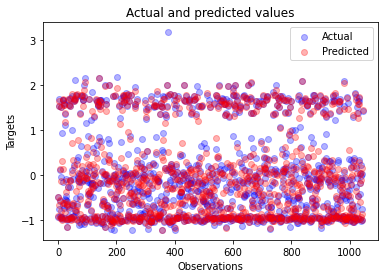

In [15]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3) #alpha is for transparency
ax.scatter(x = range(0, preds.size), y=preds, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Targets')
plt.legend() #A legend is an area describing the elements of the graph.
plt.show()

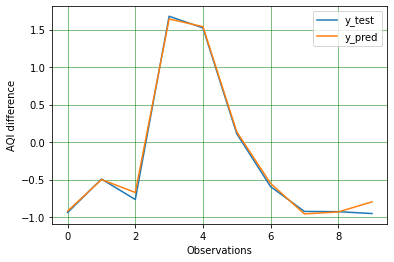

In [16]:
plt.plot(y_test.reshape(-1,1)[0:10])
plt.plot(preds.reshape(-1,1)[0:10])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Observations')
plt.ylabel('AQI difference')
plt.gca().legend(('y_test','y_pred'))
plt.show()


C:\Users\raahi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


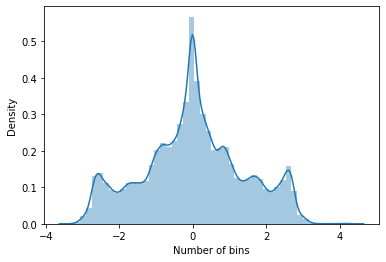

In [17]:
fig = sns.distplot(y_test-preds)
plt.xlabel("Number of bins")
plt.ylabel("Density")
plt.show(fig)

In [18]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten() #copying old array collapsed in 1D
result["PREDICTED AQI"] = preds
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["ACC OR NOT"] = np.where(abs(result["DIFFERENCE"])<= 0.5, "Accurate", "Inaccurate")
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(21)


,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,ACC OR NOT,PERCENTAGE ERROR
0,-0.937115,-0.918618,-0.018496,Accurate,-1.973735
1,-0.491889,-0.498740,0.006850,Accurate,-1.392670
2,-0.764931,-0.670773,-0.094158,Accurate,-12.309364
3,1.678678,1.642310,0.036368,Accurate,2.166482
4,1.522971,1.539599,-0.016629,Accurate,1.091878
5,0.111675,0.137348,-0.025672,Accurate,22.988494
6,-0.592484,-0.550508,-0.041975,Accurate,-7.084653
7,-0.923677,-0.956787,0.033110,Accurate,-3.584549
8,-0.926793,-0.930671,0.003878,Accurate,-0.418412
9,-0.951748,-0.795813,-0.155935,Accurate,-16.384070
